In [187]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
'Numerical Analysis HW6 - Srikar Iyer'

'Numerical Analysis HW6 - Srikar Iyer'

In [188]:
def trapez(f,a,b,m):
    h=(b-a)/m #defines size of each slice
    totalarea=(f(a)+f(b))/2 #adds f(a), f(b) first to the trapezoidal approximation since they are harder to loop over.
    for i in range(1, int(m)): #iterating from the second to the 2nd to last slices 
        totalarea = totalarea + f(a + i*h) #adds the trapezoidal approximation of the 2nd to the last slices. This is more loop friendly. 
    return h*totalarea #multiplies each value of the slices with the size of each slice to get the total area

def g(t):
    return np.sqrt(t) #defining the function to approximate
def ans():
    return 2/3-1/(15*np.sqrt(10)) #getting the correct value of the integration in order to show error
def error(f,a,b,m):
    return ans() - trapez(f,a,b,m) #error = exact - approximate

print(trapez(g, 0.1, 1, 100)) #printing the approximation using the trapezoid rule
print(error(g,0.1,1,100)) #printing the error from the exact and approximative value







0.6455775189871522
7.296611725271518e-06


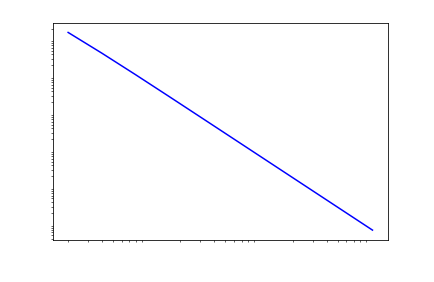

In [189]:

# inputs to plot using loglog plot
x_input = np.array([2,4,8,16,32,64,128,256,512,1024]) #making a vector of quadrature slices in increasing order
y_input = np.zeros(10) #making a vector of the same size
for i in range(len(x_input)): 
    y_input[i] = y_input[i] + error(g, 0.1, 1, x_input[i]) #adding the trapezoidal error of the integral from 0.1 to 1 of f(x)=sqrt(x)
fig = plt.figure()
ax = fig.add_subplot(111) #setting a specific size

ax.set_xlabel('Slice Count') #setting name of X-a
ax.set_ylabel('Error') #setting name of Y-axis
ax.set_title('Number Of Slices vs Quadrature Error of Composite Trapezoidal Rule') #setting title name

ax.xaxis.label.set_color('white')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('white')          #setting up Y-axis label color to blue
ax.title.set_color('white')          #setting up Y-axis label color to blue

ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='white')  #setting up Y-axis tick color to black

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['top'].set_color('black')         #setting up above X-axis tick color to red

plt.show(plt.loglog(x_input, y_input, 'b')) # plotting the value of x_input and y_input using loglog plot


In [190]:
print("We know that \u03B5 = C*m^\u03BA. Then, log(\u03B5) = log(C) + \u03BA*m. We can find \u03BA by finding the of the line of best fit")
print("by finding log(C), or D, and \u03BA using a least squares regression.") 

t = np.arange(1, 11)

A = np.zeros((len(t),2))

A[:,0] = t
A[:,1] = np.array([2,4,8,16,32,64,128,256,512,1024])
b = np.array([1.57046363e-02, 4.29830095e-03, 1.11837851e-03, 2.83514990e-04,
7.11653687e-05, 1.78102246e-05, 4.45375385e-06, 1.11351361e-06,
2.78383102e-07, 6.95960696e-08])
print(A, b) #creating a linear system

We know that ε = C*m^κ. Then, log(ε) = log(C) + κ*m. We can find κ by finding the of the line of best fit
by finding log(C), or D, and κ using a least squares regression.
[[1.000e+00 2.000e+00]
 [2.000e+00 4.000e+00]
 [3.000e+00 8.000e+00]
 [4.000e+00 1.600e+01]
 [5.000e+00 3.200e+01]
 [6.000e+00 6.400e+01]
 [7.000e+00 1.280e+02]
 [8.000e+00 2.560e+02]
 [9.000e+00 5.120e+02]
 [1.000e+01 1.024e+03]] [1.57046363e-02 4.29830095e-03 1.11837851e-03 2.83514990e-04
 7.11653687e-05 1.78102246e-05 4.45375385e-06 1.11351361e-06
 2.78383102e-07 6.95960696e-08]


In [191]:
Q, R = linalg.qr(A) #QR factorizing A
coeffs_1 = linalg.solve(R, Q.transpose() @ b) #solving the linear system Ax=b by utilizing the facts QRx=b and Rx=Q^Tb
coeffs_1
#So now we can create a linear least squares approximation
print("So, \u03BA is 2.59210833e-06 and D is 2.00206059e-04 through solving the least square system.")
print("From the textbook, \u03BA is derived as M (b-a)^3 / 12m^2 where M is the maximum absolute value of the 2nd derivative of f(\u03BE) where") 
print(" \u03BE is between a and b. In this case, we assume m=10 to compare, so \u03BE = 2.656*(1-0.1)^3/(12*10^2)")
print(" which is around 1.61*10^-4, which is close to our approximation.")

So, κ is 2.59210833e-06 and D is 2.00206059e-04 through solving the least square system.
From the textbook, κ is derived as M (b-a)^3 / 12m^2 where M is the maximum absolute value of the 2nd derivative of f(ξ) where
 ξ is between a and b. In this case, we assume m=10 to compare, so ξ = 2.656*(1-0.1)^3/(12*10^2)
 which is around 1.61*10^-4, which is close to our approximation.


In [192]:
#We redo 4a and 4b for sqrt(x) on the interval a=0 and a=1. 
print(trapez(g, 0, 1, 100)) #printing the approximation using the trapezoid rule
print(error(g,0,1,100)) #printing the error from the exact and approximative value


0.6664629471031477
-0.020878131504270203


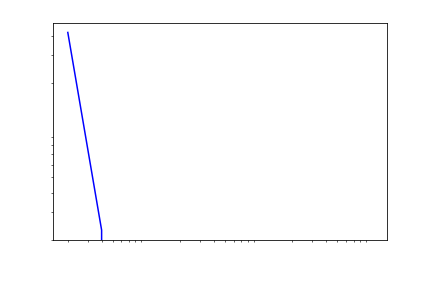

[ 0.04203143  0.00230177 -0.01254541 -0.01799638 -0.01997412 -0.020686
 -0.02094084 -0.02103173 -0.02106407 -0.02107555]


In [193]:
# inputs to plot using loglog plot
x_input = np.array([2,4,8,16,32,64,128,256,512,1024]) #making a vector of quadrature slices in increasing order
y_input = np.zeros(10) #making a vector of the same size
for i in range(len(x_input)): 
    y_input[i] = y_input[i] + error(g, 0, 1, x_input[i]) #adding the trapezoidal error of the integral from 0.1 to 1 of f(x)=sqrt(x)
fig = plt.figure()
ax = fig.add_subplot(111) #setting a specific size

ax.set_xlabel('Slice Count') #setting name of X-a
ax.set_ylabel('Error') #setting name of Y-axis
ax.set_title('Number Of Slices vs Quadrature Error of Composite Trapezoidal Rule') #setting title name

ax.xaxis.label.set_color('white')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('white')          #setting up Y-axis label color to blue
ax.title.set_color('white')          #setting up Y-axis label color to blue

ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='white')  #setting up Y-axis tick color to black

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['top'].set_color('black')         #setting up above X-axis tick color to red

plt.show(plt.loglog(x_input, y_input, 'b')) # plotting the value of x_input and y_input using loglog plot
print(y_input)


In [194]:
#The least squares regression would be similar, with only b changing.

t = np.arange(1, 11)

A = np.zeros((len(t),2))

A[:,0] = t
A[:,1] = np.array([2,4,8,16,32,64,128,256,512,1024])
b = np.array([ 0.04203143,  0.00230177, -0.01254541, -0.01799638, -0.01997412, -0.020686,
-0.02094084, -0.02103173, -0.02106407, -0.02107555])
print(A, b) #creating a linear system



[[1.000e+00 2.000e+00]
 [2.000e+00 4.000e+00]
 [3.000e+00 8.000e+00]
 [4.000e+00 1.600e+01]
 [5.000e+00 3.200e+01]
 [6.000e+00 6.400e+01]
 [7.000e+00 1.280e+02]
 [8.000e+00 2.560e+02]
 [9.000e+00 5.120e+02]
 [1.000e+01 1.024e+03]] [ 0.04203143  0.00230177 -0.01254541 -0.01799638 -0.01997412 -0.020686
 -0.02094084 -0.02103173 -0.02106407 -0.02107555]


In [195]:
Q, R = linalg.qr(A) #QR factorizing A
coeffs_1 = linalg.solve(R, Q.transpose() @ b) #solving the linear system Ax=b by utilizing the facts QRx=b and Rx=Q^Tb
coeffs_1

array([-3.09475618e-03,  1.02710154e-05])

In [196]:
print("So, \u03BA is -3.09475618e-03 and D is 1.02710154e-05 in our linear approximation.")
print("We cannot use the theoretical estimates of the integral of f(x) from 0 to 1. This is because the taylor approximation of f, which is")
print("required to derive a polynomial approximation of the error of f, requires the derivative of f to exist. However, f'(0) = ")
print("1/(2*0) = 1/0. Because this does not exist, the theoretical estimates do not exist either.")

So, κ is -3.09475618e-03 and D is 1.02710154e-05 in our linear approximation.
We cannot use the theoretical estimates of the integral of f(x) from 0 to 1. This is because the taylor approximation of f, which is
required to derive a polynomial approximation of the error of f, requires the derivative of f to exist. However, f'(0) = 
1/(2*0) = 1/0. Because this does not exist, the theoretical estimates do not exist either.


In [204]:
print("We plot the error of I_k and the Gaussian Quadrature approximation") 
I = np.array([1, 5/6, 3/4, 7/10, 2/3, 9/14, 6/8]) #
#Then, we calculate the 3 point Gaussian Quadrature Method Approximation for each k through Wolframalpha, and return the array
S = np.array([1, 1, 1, 1.05, 1.125, 1.2225, 1.34125])
E = I-S #creating the error of Gaussian Quadrature vs actual integration
for i in range(len(E)):
    E=np.abs(E)
print(E)



We plot the error of I_k and the Gaussian Quadrature approximation
[0.         0.16666667 0.25       0.35       0.45833333 0.57964286
 0.59125   ]


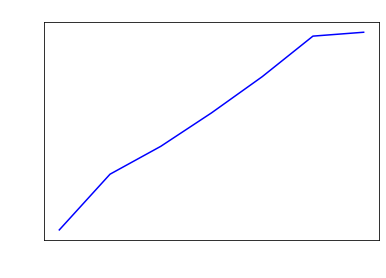

In [205]:
# inputs to plot using loglog plot
x_iterate = np.array([1,2,3,4,5,6,7]) #making a vector of quadrature slices in increasing order

fig = plt.figure()
ax = fig.add_subplot(111) #setting a specific size

ax.set_xlabel('Slice Count') #setting name of X-acis
ax.set_ylabel('Error') #setting name of Y-axis
ax.set_title('k vs Gaussian Quadrature Error') #setting title name

ax.xaxis.label.set_color('white')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('white')          #setting up Y-axis label color to blue
ax.title.set_color('white')          #setting up Y-axis label color to blue

ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='white')  #setting up Y-axis tick color to black

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['top'].set_color('black')         #setting up above X-axis tick color to red

plt.show(plt.plot(x_iterate, E, 'b')) # plotting the final graph
